# Bouncing ball with the Euler integrator
As an introduction to solving ODEs we are solving the problem of the bouncing ball with the simplest of all integrators: the forward Euler scheme.

We have to solve the *second order ODE* (Newton's equations of motion with constant acceleration)
$$
\frac{d^2 y}{dt^2} = -g.
$$

## Euler integrator
The Euler scheme for any *first order ODE* 

$$
\frac{dy}{dt} = f(y, t)
$$

is
$$
y(t + h) = y(t) + h f(y(t), t).
$$

## Reduce one 2nd order ODE to two 1st order ODEs
In order to solve the original 2nd order equation of motion we make use of the fact that one $n$-th order ODE can be written as $n$ coupled first order ODEs, namely 

\begin{align}
\frac{dy}{dt} &= v\\
\frac{dv}{dt} &= -g.
\end{align}

Solve each of the first order ODEs with Euler:

\begin{align}
y(t + h) &= y(t) + h v(t)\\
v(t + h) &= v(t) - h g.
\end{align}

In [1]:
import numpy as np

## Free fall 

Start with free fall

In [2]:
g = -9.81
y = 0.0
v = 0.0

t = 0
dt = 0.01

data = []

while t < 10:
    y = y + v*dt
    v = v + g*dt
    data.append([t, y, v]) 
    t += dt

data = np.array(data) 

In [3]:
data.shape

(1001, 3)

In [4]:
data = data.transpose()
data.shape  # t, y, v

(3, 1001)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

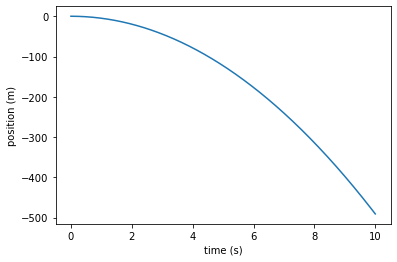

In [6]:
plt.plot(data[0], data[1])
plt.xlabel("time (s)")
plt.ylabel("position (m)");

## Bouncing
Add a floor at $y = 0$ and release the ball at $y_0 = 5$.

What happens at the floor? – The velocity changes (elastic collision).

In [13]:
g = -9.81
y = 5.0
v = 0.0

t = 0
dt = 0.01

y_floor = 0

data = []

while t < 10:
    y += v*dt
    if y > y_floor:
        v += g*dt
    else:
        v = -v   # bounce off floor
    data.append([t, y, v]) 
    t += dt

data = np.array(data).transpose() 

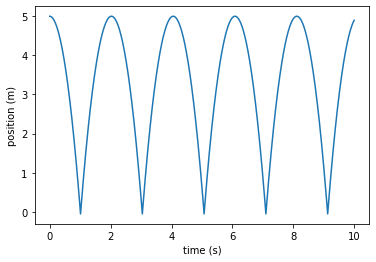

In [14]:
plt.plot(data[0], data[1])
plt.xlabel("time (s)")
plt.ylabel("position (m)");